# Tracer simulation results

* A notebook shows my NEMO run, frequently changing.

In [26]:
import sys
sys.path.insert(0, '_libs/')

In [27]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [28]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

In [168]:
def plot_Ba(nav_lon, nav_lat, Ba_masked, lev, cmap, ax):
    proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    # Ba
    CS=proj.contourf(x, y, Ba_masked, lev, cmap=cmap, extend='both')
    proj.contour(x, y, Ba_masked, lev, linewidths=1.5, colors=('gray',))
    # Frame
    proj.plot(x.T, y.T, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    proj.plot(x, y, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    return CS
def plot1(full, ice, rf, none, ax):
    ax.grid()
    ax.plot(full, lw=3, label='FULL')
    ax.plot(rf, '--', lw=3, label='RF')
    ax.plot(ice, '--', lw=3, label='ICE')
    ax.plot(none, '--', lw=3, label='NONE')
    ax.set_xticks(np.arange(1, 41, 2)) 
def plot3(IO, AO, RF, DIL, ax):
    ax.plot(IO, lw=3, label='Ice=>Ocean')
    ax.plot(AO, lw=3, label='Atmos=>Ocean')
    ax.plot(RF, lw=3, label='Runoff')
    ax.plot(DIL, lw=3, label='Dilution flux')
    ax.set_xticks(np.arange(1, 41, 2))

In [30]:
boundary_name=glob.glob('_data/Exchange/TRC_BOUND.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
domain=Boundary_Mat['domain']

In [31]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ORCA2_Ba.mat')
Ba_orca = MAT['Ba_ini_orca'][:]

In [148]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ORCA2_d18O.mat')
d18O_orca = MAT['d18O_ini_orca'][:]

In [80]:
ptrc_obj = nc.Dataset('_data\TEST02_1m_00000101_00030604_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]
d18O=ptrc_obj.variables['d18O'][:]
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [161]:
TEST01 = nc.Dataset('_data\TEST02_1m_00000101_00030604_ptrc_T.nc')
NORF01 = nc.Dataset('_data\NORF02_1m_00000101_00030604_ptrc_T.nc')
NOICE01 = nc.Dataset('_data\NOICE02_1m_00000101_00030604_ptrc_T.nc')
NONE01 = nc.Dataset('_data\NONE02_1m_00000101_00030604_ptrc_T.nc')
Ba1=TEST01.variables['Ba'][:]; Ba2=NORF01.variables['Ba'][:]
Ba3=NOICE01.variables['Ba'][:]; Ba4=NONE01.variables['Ba'][:]
d18O1=TEST01.variables['d18O'][:]; d18O2=NORF01.variables['d18O'][:]
d18O3=NOICE01.variables['d18O'][:]; d18O4=NONE01.variables['d18O'][:]

In [102]:
name=glob.glob('_data/NEMO/INPUT_DYNA/*')
NC = nc.Dataset(name[0]); S = NC.variables['vosaline']

In [34]:
OB1 = Ba1[:41, 0, 145, -32]; OB2 = Ba2[:, 0, 145, -32]; OB3 = Ba3[:, 0, 145, -32]; OB4 = Ba4[:, 0, 145, -32]
MK1 = Ba1[:41, 0, 131, 67];  MK2 = Ba2[:, 0, 131, 67];  MK3 = Ba3[:, 0, 131, 67];  MK4 = Ba4[:, 0, 131, 67]
CA1 = Ba1[:41, 0, 138, 55];  CA2 = Ba2[:, 0, 138, 55];  CA3 = Ba3[:, 0, 138, 55];  CA4 = Ba4[:, 0, 138, 55]
FR1 = Ba1[:41, 0, 135, -48]; FR2 = Ba2[:, 0, 135, -48]; FR3 = Ba3[:, 0, 135, -48]; FR4 = Ba4[:, 0, 135, -48]

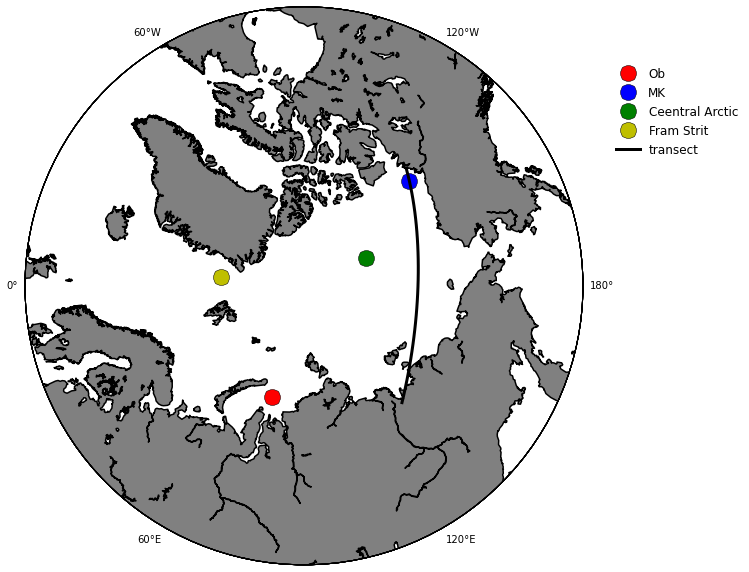

In [79]:
fig=plt.figure(figsize=(10, 10)); ax=plt.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x1, y1 = proj(nav_lon[145, -32], nav_lat[145, -32])
x2, y2 = proj(nav_lon[131, 67], nav_lat[131, 67])
x3, y3 = proj(nav_lon[138, 55], nav_lat[138, 55])
x4, y4 = proj(nav_lon[135, -48], nav_lat[135, -48])
x5, y5 = proj(nav_lon[131, 35:70], nav_lat[131, 35:70])
proj.plot(x1, y1, 'ro', ms=16, label='Ob')
proj.plot(x2, y2, 'bo', ms=16, label='MK')
proj.plot(x3, y3, 'go', ms=16, label='Ceentral Arctic')
proj.plot(x4, y4, 'yo', ms=16, label='Fram Strit')
proj.plot(x5, y5, 'k-', lw=3, ms=16, label='transect')
LG = ax.legend(numpoints=1, bbox_to_anchor=(1.05, 0.9), loc=2, borderaxespad=0.); LG.draw_frame(False)

# Ba

In [99]:
L = 1
lev1 = range(40, 73, 3)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]

In [36]:
Ba_Jan = np.ma.masked_where(((domain==0) | (Ba[24, L, :, :]==0)), Ba[24, L, :, :])
Ba_Apr = np.ma.masked_where(((domain==0) | (Ba[27, L, :, :]==0)), Ba[27, L, :, :])
Ba_Jul = np.ma.masked_where(((domain==0) | (Ba[30, L, :, :]==0)), Ba[30, L, :, :])
Ba_Oct = np.ma.masked_where(((domain==0) | (Ba[33, L, :, :]==0)), Ba[30, L, :, :])

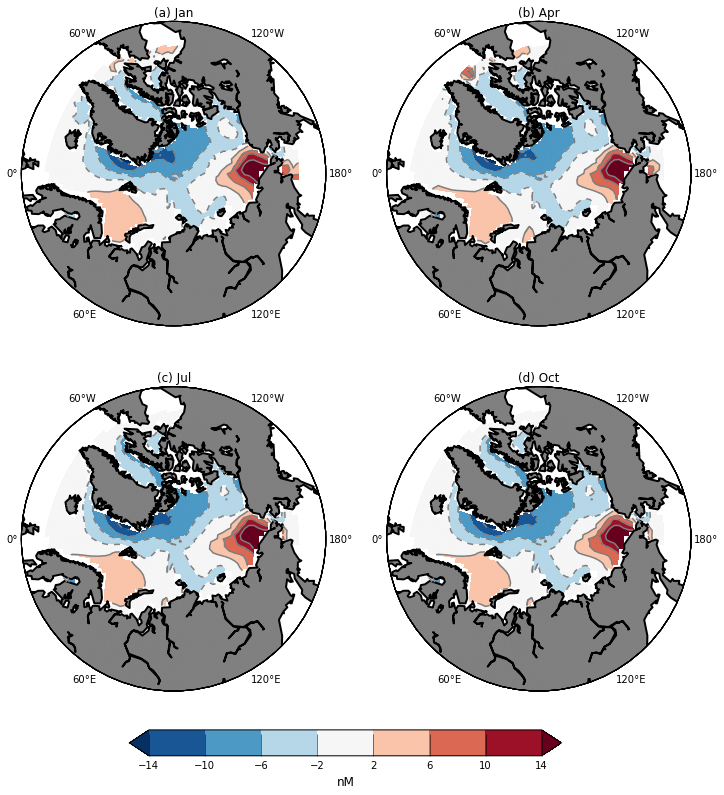

In [37]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, Ba_Jan-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, Ba_Apr-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax2)
CS3 = plot_Ba(nav_lon, nav_lat, Ba_Jul-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax3)
CS4 = plot_Ba(nav_lon, nav_lat, Ba_Oct-Ba_orca[L, :, :], lev2, plt.cm.RdBu_r, ax4)
# Title
ax1.set_title('(a) Jan'); ax2.set_title('(b) Apr')
ax3.set_title('(c) Jul'); ax4.set_title('(d) Oct')
# cbar
cax2  = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('nM', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev2)

In [130]:
lon

array([ 129.99659729,  132.32440186,  134.76138306,  137.31130981,
        139.97689819,  142.75961304,  145.65924072,  148.67367554,
        151.79852295,  155.02690125,  158.34927368,  161.75340271,
        165.22451782,  168.74555969,  172.29779053,  175.86128235,
        179.41575623, -177.05867004, -173.58073425, -170.16741943,
       -166.83346558, -163.59103394, -160.44958496, -157.41593933,
       -154.49441528, -151.68704224, -148.993927  , -146.41357422,
       -143.94314575, -141.5788269 , -139.31604004, -137.1497345 ,
       -135.07449341, -133.08477783, -131.17495728], dtype=float32)

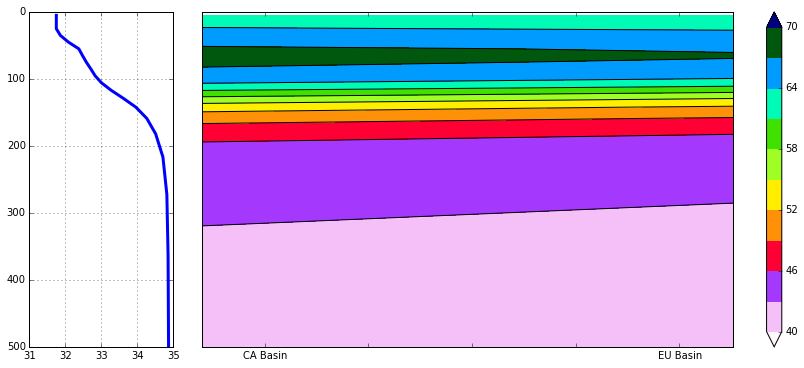

In [149]:
lon = nav_lon[131, 35:70]
x, y = np.meshgrid(lon, deptht)
salin = S[24, :, 131, 52]
# Plot
fig = plt.figure(figsize=(15, 6))
ax1 = plt.subplot2grid((1, 5), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 5), (0, 1), colspan=4, rowspan=1)
# Frame 1
ax1.plot(salin, deptht, 'b-', lw=3)
ax1.set_ylim([0, 500])
ax1.set_xlim([31, 35])
ax1.set_xticks(range(31, 36))
ax1.grid()
ax1.invert_yaxis()
# Frame 2
CS=ax2.contourf(x, y, Ba[24, :, 131, 35:70], lev1, cmap=plt.cm.gist_ncar_r, extend='both')
ax2.contour(x, y, Ba[24, :, 131, 35:70], lev1, colors = ('k',), linewidth=1)
CBar=plt.colorbar(CS)
ax2.set_xticklabels(['', 'CA Basin', '', '', '', 'EU Basin'])
ax2.yaxis.set_visible(False)
ax2.set_xlim([-130, 126])
ax2.set_ylim([0, 500])
ax2.invert_yaxis()

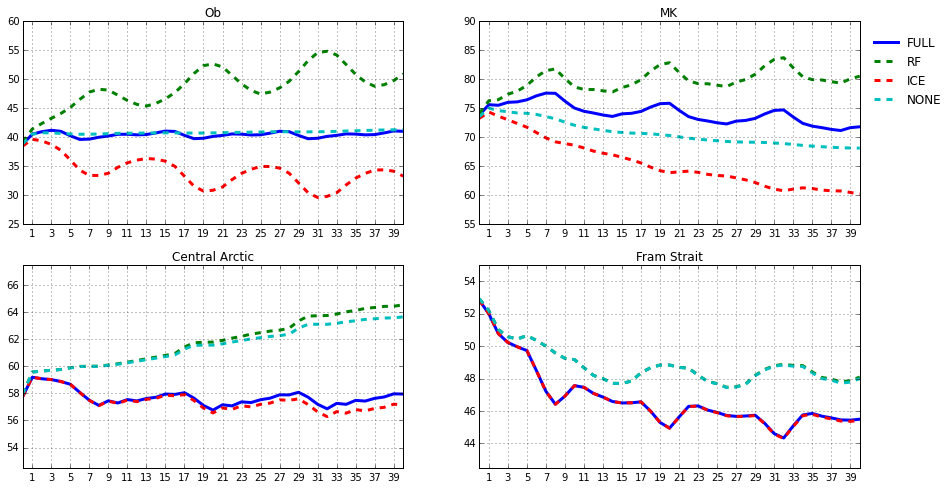

In [44]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot1(OB1, OB2, OB3, OB4, ax1); ax1.set_title('Ob')
plot1(MK1, MK2, MK3, MK4, ax2); ax2.set_title('MK')
plot1(CA1, CA2, CA3, CA4, ax3); ax3.set_title('Central Arctic')
plot1(FR1, FR2, FR3, FR4, ax4); ax4.set_title('Fram Strait')
ax1.set_ylim([25, 60]); ax2.set_ylim([55, 90]); 
ax3.set_ylim([52.5, 67.5]); ax4.set_ylim([42.5, 55])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(1.025, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

#$\mathsf{\delta^{18}O}$ Simulation

In [152]:
L = 0
lev1 = [-3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5]
lev2 = [-1.5, -1, -0.5, 0, 0.5, 1, 1.5]

In [153]:
d18O_Jan = np.ma.masked_where(((domain==0) | (Ba[24, L, :, :]==0)), d18O[24, L, :, :])
d18O_Apr = np.ma.masked_where(((domain==0) | (Ba[27, L, :, :]==0)), d18O[27, L, :, :])
d18O_Jul = np.ma.masked_where(((domain==0) | (Ba[30, L, :, :]==0)), d18O[30, L, :, :])
d18O_Oct = np.ma.masked_where(((domain==0) | (Ba[33, L, :, :]==0)), d18O[30, L, :, :])

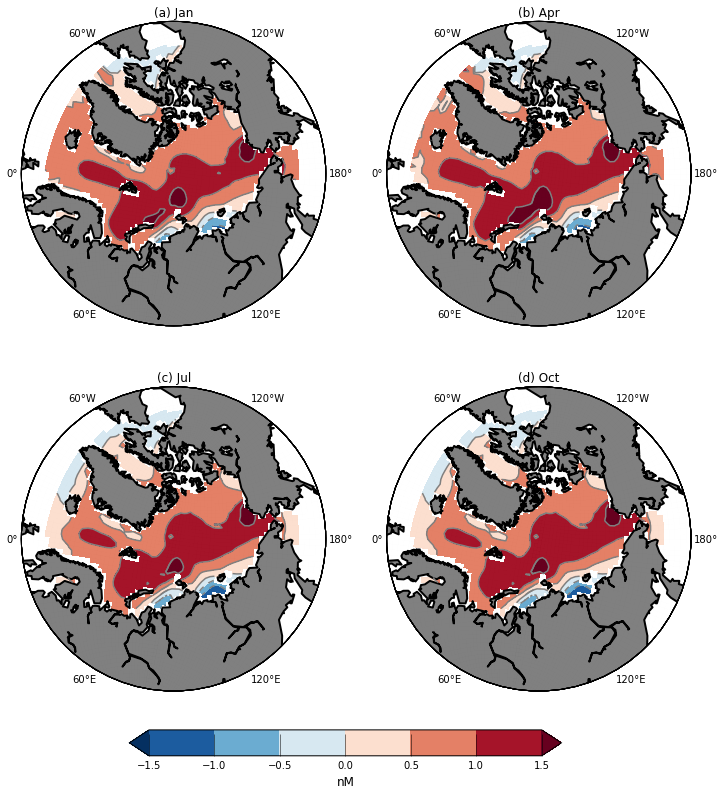

In [155]:
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)

CS1 = plot_Ba(nav_lon, nav_lat, d18O_Jan-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax1)
CS2 = plot_Ba(nav_lon, nav_lat, d18O_Apr-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax2)
CS3 = plot_Ba(nav_lon, nav_lat, d18O_Jul-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax3)
CS4 = plot_Ba(nav_lon, nav_lat, d18O_Oct-d18O_orca[L, :, :], lev2, plt.cm.RdBu_r, ax4)
# Title
ax1.set_title('(a) Jan'); ax2.set_title('(b) Apr')
ax3.set_title('(c) Jul'); ax4.set_title('(d) Oct')
# cbar
cax2  = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar2 = fig.colorbar(CS2, cax=cax2, orientation='horizontal')
CBar2.set_label('nM', fontsize=12)
CBar2.ax.tick_params(axis='x', length=22)
CBar2.set_ticks(lev2)

In [162]:
OB1 = d18O1[:41, 0, 145, -32]; OB2 = d18O2[:, 0, 145, -32]; OB3 = d18O3[:, 0, 145, -32]; OB4 = d18O4[:, 0, 145, -32]
MK1 = d18O1[:41, 0, 131, 67];  MK2 = d18O2[:, 0, 131, 67];  MK3 = d18O3[:, 0, 131, 67];  MK4 = d18O4[:, 0, 131, 67]
CA1 = d18O1[:41, 0, 138, 55];  CA2 = d18O2[:, 0, 138, 55];  CA3 = d18O3[:, 0, 138, 55];  CA4 = d18O4[:, 0, 138, 55]
FR1 = d18O1[:41, 0, 135, -48]; FR2 = d18O2[:, 0, 135, -48]; FR3 = d18O3[:, 0, 135, -48]; FR4 = d18O4[:, 0, 135, -48]

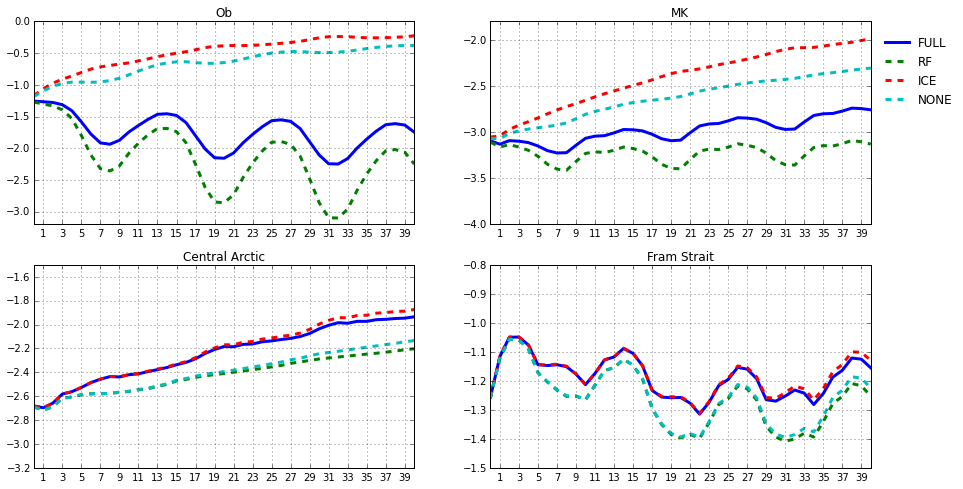

In [166]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot1(OB1, OB2, OB3, OB4, ax1); ax1.set_title('Ob')
plot1(MK1, MK2, MK3, MK4, ax2); ax2.set_title('MK')
plot1(CA1, CA2, CA3, CA4, ax3); ax3.set_title('Central Arctic')
plot1(FR1, FR2, FR3, FR4, ax4); ax4.set_title('Fram Strait')
ax1.set_ylim([-3.2, 0]); ax2.set_ylim([-4, -1.8])
ax3.set_ylim([-3.2, -1.5]); ax4.set_ylim([-1.5, -0.8])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(1.025, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)

In [167]:
name=glob.glob('_data/NEMO/INPUT_DYNA/*')
NC = nc.Dataset(name[0]) 
IO= NC.variables['iowaflup']; AO = NC.variables['sowaflep']; S = NC.variables['vosaline']
T = NC.variables['votemper']; RF = NC.variables['sorunoff']; DIL = NC.variables['sowaflcd']
IO1=IO[0:41, 145, -32]; IO2=IO[0:41, 131, 67]; IO3=IO[0:41, 138, 55]; IO4=IO[0:41, 135, -48]
AO1=AO[0:41, 145, -32]; AO2=AO[0:41, 131, 67]; AO3=AO[0:41, 138, 55]; AO4=AO[0:41, 135, -48]
RF1=RF[0:41, 145, -32]; RF2=RF[0:41, 131, 67]; RF3=RF[0:41, 138, 55]; RF4=RF[0:41, 135, -48]
DIL1=DIL[0:41, 145, -32]; DIL2=DIL[0:41, 131, 67]; DIL3=DIL[0:41, 138, 55]; DIL4=DIL[0:41, 135, -48]
T1=T[0:41, 0, 145, -32]; T2=T[0:41, 0, 131, 67]; T3=T[0:41, 0, 138, 55]; T4=T[0:41, 0, 135, -48]
S1=S[0:41, 0, 145, -32]; S2=S[0:41, 0, 131, 67]; S3=S[0:41, 0, 138, 55]; S4=S[0:41, 0, 135, -48]

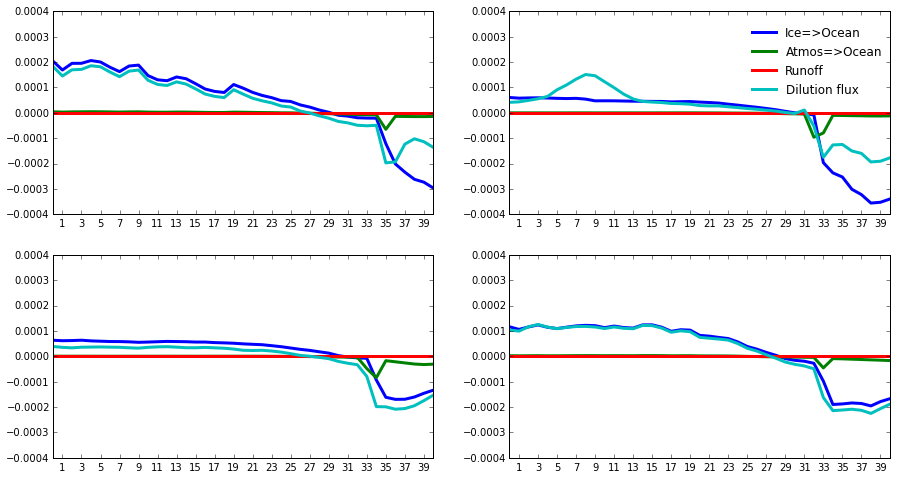

In [169]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
ax4 = plt.subplot2grid((2, 2), (1, 1), colspan=1, rowspan=1)
plot3(IO1, AO1, RF1, DIL1, ax1)
plot3(IO2, AO2, RF2, DIL2, ax2)
plot3(IO3, AO3, RF3, DIL3, ax3)
plot3(IO4, AO4, RF4, DIL4, ax4)
ax1.set_ylim([-4e-4, 4e-4]); ax2.set_ylim([-4e-4, 4e-4])
ax3.set_ylim([-4e-4, 4e-4]); ax4.set_ylim([-4e-4, 4e-4])
LG = ax2.legend(numpoints=1, bbox_to_anchor=(0.625, 0.95), loc=2, borderaxespad=0.); LG.draw_frame(False)